In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import pickle

In [28]:
import pandas as pd
#data1 = pd.read_csv('/content/sample_data/penguins.csv')
data1 = pd.read_csv('penguins.csv')

In [29]:
data1.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [30]:
#rename columns
data1 = data1.rename(columns={'species':'Species','island':'Island','bill_length_mm': 'Bill Length', 'bill_depth_mm': 'Bill Depth','flipper_length_mm': 'Flipper Length','body_mass_g': 'Body Mass','sex':'Sex','year':'Year'})

In [31]:
data1.head()

,Species,Island,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex,Year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Text(0, 0.5, 'Body Mass')

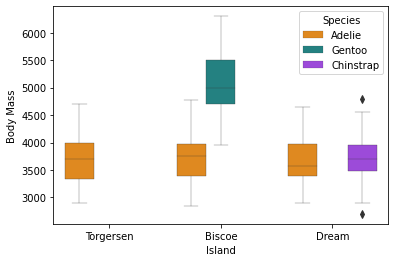

In [32]:
#data = penguins,
g = sns.boxplot(x = 'Island',
            y ='Body Mass',
            hue = 'Species',
            data = data1,
            palette=['#FF8C00','#159090','#A034F0'],
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')

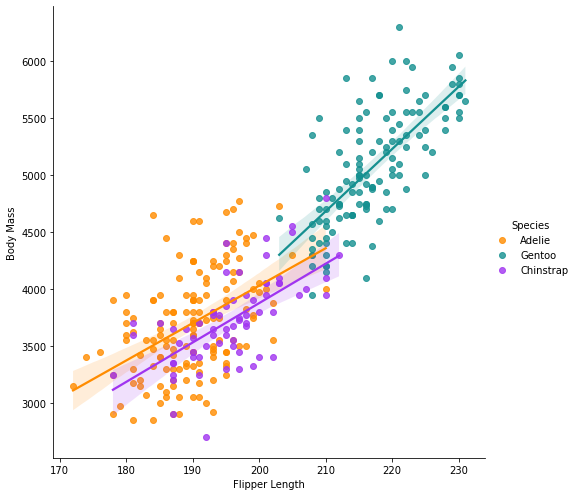

In [33]:
g = sns.lmplot(x="Flipper Length",
               y="Body Mass",
               hue="Species",
               height=7,
               data=data1,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')

In [121]:
data1.tail()

,Species,Island,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex,Year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [122]:
data1.shape

(344, 8)

In [123]:
# Check for null values
print(len(data1) - data1.count())

Species            0
Island             0
Bill Length        2
Bill Depth         2
Flipper Length     2
Body Mass          2
Sex               11
Year               0
dtype: int64


In [124]:
data1 = data1.dropna()

In [125]:
# Check for null values
print(len(data1) - data1.count())

Species           0
Island            0
Bill Length       0
Bill Depth        0
Flipper Length    0
Body Mass         0
Sex               0
Year              0
dtype: int64


In [126]:
data1.shape

(333, 8)

<AxesSubplot:>

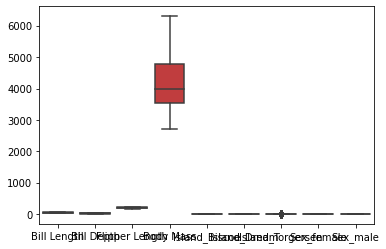

In [127]:
# Boxplot for Visualization
sns.boxplot(data = x_train)

In [128]:
# Scaling using Normalization
min_max_scaler = MinMaxScaler().fit(x_train)
normTrainX = min_max_scaler.transform(x_train)
print('normTrainX', normTrainX.shape)

normTrainX (266, 9)


<AxesSubplot:>

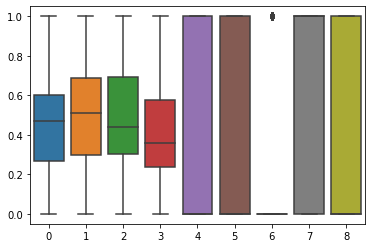

In [129]:
# Boxplot after normalization
sns.boxplot(data = normTrainX)

In [130]:
# features and target
target = data1['Species']
features = data1[['Island', 'Bill Length', 'Bill Depth',

                       'Flipper Length', 'Body Mass', 'Sex']]

In [131]:
features.head()

,Island,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Torgersen,39.1,18.7,181.0,3750.0,male
1,Torgersen,39.5,17.4,186.0,3800.0,female
2,Torgersen,40.3,18.0,195.0,3250.0,female
4,Torgersen,36.7,19.3,193.0,3450.0,female
5,Torgersen,39.3,20.6,190.0,3650.0,male


In [132]:
target.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: Species, dtype: object

In [133]:
# count of unique values in target 
data1['Species'].nunique()

3

In [134]:
# unique values in target
print(data1['Species'].unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [135]:
#data1['Species'].nunique()

In [136]:
#data1['Species'].unique()

In [137]:
# Convert categorical to numerical so we can use it for correlation
features = pd.get_dummies(features)
target, uniques = pd.factorize(target)

                  Bill Length  Bill Depth  Flipper Length  Body Mass  \
Bill Length          1.000000   -0.228626        0.653096   0.589451   
Bill Depth          -0.228626    1.000000       -0.577792  -0.472016   
Flipper Length       0.653096   -0.577792        1.000000   0.872979   
Body Mass            0.589451   -0.472016        0.872979   1.000000   
Island_Biscoe        0.225174   -0.626230        0.601126   0.623702   
Island_Dream         0.032118    0.457326       -0.425459  -0.464666   
Island_Torgersen    -0.367821    0.265173       -0.273304  -0.251369   
Sex_female          -0.344078   -0.372673       -0.255169  -0.424987   
Sex_male             0.344078    0.372673        0.255169   0.424987   

                  Island_Biscoe  Island_Dream  Island_Torgersen  Sex_female  \
Bill Length            0.225174      0.032118         -0.367821   -0.344078   
Bill Depth            -0.626230      0.457326          0.265173   -0.372673   
Flipper Length         0.601126     -0.425

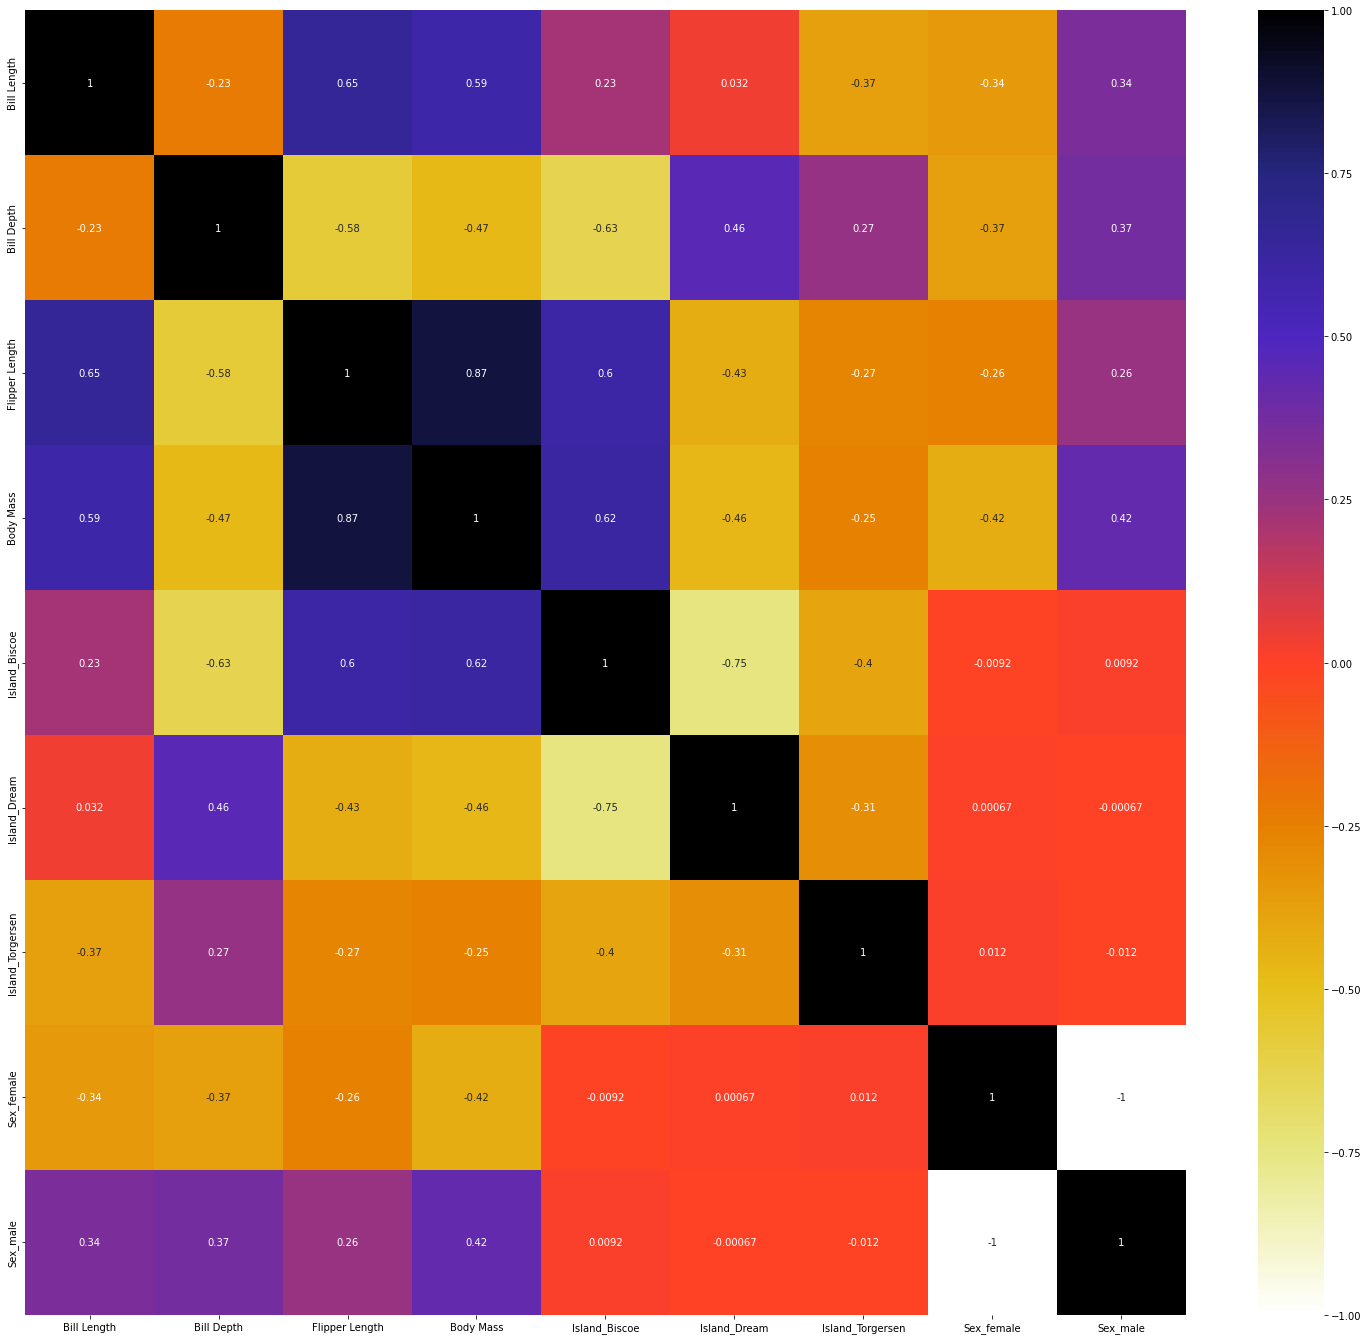

In [138]:
# Heatmap using Pearson Correlation
plt.figure(figsize=(26,24))
cor = features.corr()
#print(cor)
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [139]:
# With the following function we can select highly correlated features
def correlation(features, threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = features.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: #we are interested in absolute coeff value
                colname = corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

# Set the threshold to 0.7
corr_features = correlation(features, 0.5)
len(set(corr_features))

# Get columns with high correlation
print(corr_features)

{'Island_Dream', 'Island_Biscoe', 'Body Mass', 'Sex_male', 'Flipper Length'}


In [140]:
print('Here is what our unique output variables represent') 
print(uniques)
print('Here is the target') 
print(target)
print('Here are our feature variables') 
print(features.head())

Here is what our unique output variables represent
Index(['Adelie', 'Gentoo', 'Chinstrap'], dtype='object')
Here is the target
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Here are our feature variables
   Bill Length  Bill Depth  Flipper Length  Body Mass  Island_Biscoe  \
0         39.1        18.7           181.0     3750.0              0   
1         39.5        

In [141]:
#target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [142]:
# split dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(

    features, target, test_size=.2)

In [143]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (266, 9)
x_test:  (67, 9)
y_train:  (266,)
y_test:  (67,)


<AxesSubplot:>

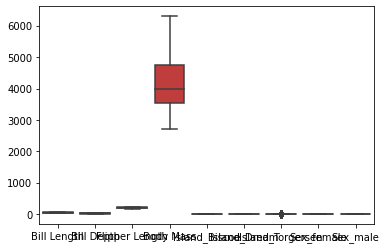

In [144]:
# Boxplot for to Visualize outlier in data
import seaborn as sns
sns.boxplot(data = x_train)

In [145]:
# Scale using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler().fit(x_train)
normTrainX = min_max_scaler.transform(x_train)
print('normTrainX', normTrainX.shape)

normTrainX (266, 9)


<AxesSubplot:>

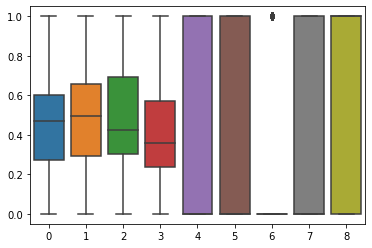

In [146]:
# Boxplot after normalization
sns.boxplot(data = normTrainX)

In [147]:
# useing RandomForestClassifier 
rfc = RandomForestClassifier(random_state=15)
# fit the model
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=15)

In [148]:
# predictions
y_pred = rfc.predict(x_test)
print(y_pred)

[0 0 1 1 0 1 1 1 1 1 1 1 0 2 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 2 2 0 2 1 2 1 0
 0 2 2 0 2 1 1 0 0 0 0 1 1 0 2 2 0 0 0 0 0 1 1 0 1 1 0 0 0 0]


In [1]:
print(y_test)

In [150]:
# Evaluate the model
score = accuracy_score(y_pred, y_test)
print('Our accuracy score for this model is {}'.format(score))

Our accuracy score for this model is 1.0


In [151]:
# accuracy of the model in percent upto 2 floating points
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy is: {accuracy*100:.2f}%')

The accuracy is: 100.00%


In [152]:
rfc.classes_

array([0, 1, 2], dtype=int64)

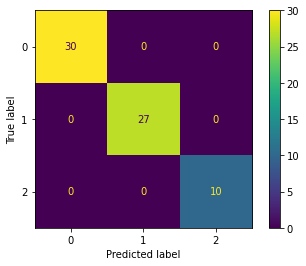

In [153]:
# Print the Confusion Matrix such that the cells of the matrix are colored
# Build and Display Confusion Matrix
# y_test has true target values for test features, 
# y_pred has predicted target values for test features
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [154]:
# Print the Classification Report
# y_test has true label / target values for test features, 
# y_pred has predicted label / target values for test features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        10

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [155]:
# print the number of correctly classified samples

# y_test has true label / target values for test features, 
# y_pred has predicted label / target values for test features
print(accuracy_score(y_test, y_pred, normalize=False))

67


In [156]:
# print the fraction of correctly classified samples

# y_test has true label / target values for test features, 
# y_pred has predicted label / target values for test features
print(accuracy_score(y_test, y_pred)) 

1.0


In [157]:
# save the model in pickle file

rf_pickle = open('random_forest_penguin.pickle', 'wb')

pickle.dump(rfc, rf_pickle)

rf_pickle.close()

output_pickle = open('output_penguin.pickle', 'wb')

pickle.dump(uniques, output_pickle)

output_pickle.close() 